# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
weatherdf = pd.DataFrame({'City': cities, 'Country': "", 'Lat': "", 'Temp': "", 'Cloudiness': "", "Humidity": "", 'WindSpeed':"", 'Date': ""})


In [4]:
urlpart1 = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q="

urlpart2 = f"&appid={weather_api_key}"


In [5]:
city = 'Atlanta'
response = requests.get(urlpart1 + city + urlpart2).json()
response

{'coord': {'lon': -84.39, 'lat': 33.75},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 72.27,
  'feels_like': 74.91,
  'temp_min': 69.8,
  'temp_max': 73.4,
  'pressure': 1020,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 4.7, 'deg': 80},
 'clouds': {'all': 90},
 'dt': 1603836555,
 'sys': {'type': 1,
  'id': 4155,
  'country': 'US',
  'sunrise': 1603799559,
  'sunset': 1603838993},
 'timezone': -14400,
 'id': 4180439,
 'name': 'Atlanta',
 'cod': 200}

In [6]:
pwd

'c:\\Users\\goroq\\Documents\\Data\\python-api-challenge\\WeatherPy'

In [7]:
weatherdf.head()

,City,Country,Lat,Temp,Cloudiness,Humidity,WindSpeed,Date
0,puerto ayora,,,,,,,
1,bethel,,,,,,,
2,yellowknife,,,,,,,
3,chuy,,,,,,,
4,bolshoye sorokino,,,,,,,


In [8]:
for index, row in weatherdf.iterrows():
    response = requests.get(urlpart1 + row['City'] + urlpart2).json()
    try:
        print(f'Grabbing data for {response["name"]}')
        weatherdf.loc[index, "Lat"] = response['coord']['lat']
        weatherdf.loc[index, "Temp"] = response['main']['temp_max']
        weatherdf.loc[index, "Humidity"] = response['main']['humidity']
        weatherdf.loc[index, "Cloudiness"] = response['clouds']['all']
        weatherdf.loc[index, "WindSpeed"] = response['wind']['speed']
        weatherdf.loc[index, "Country"] = response['sys']['country']
        weatherdf.loc[index, "Date"] = response['dt']
        
    except:
        print('City not found, next')
       

Grabbing data for Puerto Ayora
Grabbing data for Bethel
Grabbing data for Yellowknife
Grabbing data for Chui
City not found, next
Grabbing data for Albany
City not found, next
Grabbing data for Puerto Cabezas
Grabbing data for Samarai
Grabbing data for Saint-Philippe
Grabbing data for Qaqortoq
Grabbing data for Longyearbyen
Grabbing data for Vanavara
Grabbing data for Northam
Grabbing data for Bekovo
Grabbing data for Paamiut
Grabbing data for Cayenne
Grabbing data for Sabang
Grabbing data for Olafsvik
Grabbing data for Saint Paul Harbor
City not found, next
Grabbing data for Eureka
Grabbing data for ‘Ewa Beach
Grabbing data for Hermanus
Grabbing data for Umm Kaddadah
Grabbing data for Ushuaia
Grabbing data for Butaritari
Grabbing data for Bom Jardim
Grabbing data for Santa Cruz de la Sierra
Grabbing data for Severo-Kuril'sk
Grabbing data for Luganville
Grabbing data for Bariloche
Grabbing data for Isabela
Grabbing data for Hobart
Grabbing data for Vanimo
Grabbing data for Itigi
Grabbi

In [9]:
weatherdf

,City,Country,Lat,Temp,Cloudiness,Humidity,WindSpeed,Date
0,puerto ayora,EC,-0.74,75.2,40,69,10.29,1603837340
1,bethel,US,41.37,53.6,40,54,3.36,1603837199
2,yellowknife,CA,62.46,17.6,75,67,6.93,1603837361
3,chuy,UY,-33.7,61.72,100,94,14.05,1603837335
4,bolshoye sorokino,,,,,,,
...,...,...,...,...,...,...,...,...
608,mehamn,NO,71.04,32,0,84,8.05,1603837440
609,diamantino,BR,-14.41,81.32,93,72,2.86,1603837369
610,polovinnoye,RU,54.79,26.2,98,94,18.45,1603837440
611,anchorage,US,61.22,34,75,86,3.8,1603837440


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weatherdf.describe()

,City,Country,Lat,Temp,Cloudiness,Humidity,WindSpeed,Date
count,613,613,613,613,613,613,613,613
unique,613,119,547,342,80,85,273,158
top,tatarskaya kargala,RU,,,0,,,
freq,1,69,52,52,105,52,52,52


In [11]:
weatherdf["Lat"].replace('', np.nan, inplace=True)
weatherdf["Temp"].replace('', np.nan, inplace=True)
weatherdf["Cloudiness"].replace('', np.nan, inplace=True)
weatherdf["Humidity"].replace('', np.nan, inplace=True)
weatherdf["WindSpeed"].replace('', np.nan, inplace=True)
weatherdf.dropna(inplace=True)
weatherdf.describe()

,Lat,Temp,Cloudiness,Humidity,WindSpeed
count,561.000000,561.000000,561.000000,561.000000,561.000000
mean,21.259590,57.631676,53.429590,73.550802,7.857005
std,33.420912,21.757321,39.625692,20.497422,5.324936
min,-54.800000,-11.830000,0.000000,8.000000,0.310000
25%,-5.700000,42.890000,5.000000,66.000000,3.490000
50%,27.910000,62.710000,66.000000,79.000000,6.930000
75%,49.700000,75.990000,90.000000,88.000000,10.290000
max,78.220000,88.270000,100.000000,100.000000,33.550000


In [12]:
#Humidity isn't over 100%

# Export the City_Data into a csv
weatherdf.to_csv('output_data/WeatherPy.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

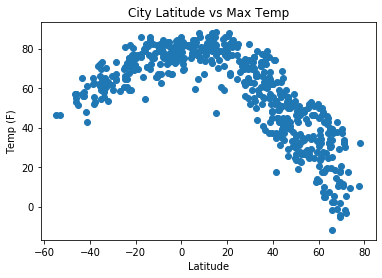

In [13]:
plt.scatter(weatherdf["Lat"], weatherdf["Temp"])
plt.title("City Latitude vs Max Temp")
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.savefig("output_data/City Latitude vs Max Temp.png")

## Latitude vs. Humidity Plot

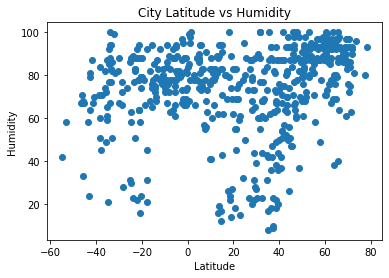

In [14]:
plt.scatter(weatherdf["Lat"], weatherdf["Humidity"])
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

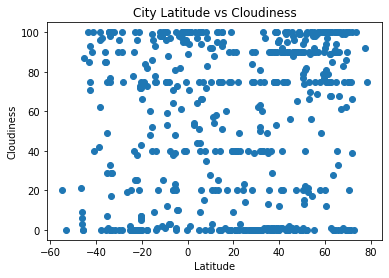

In [15]:
plt.scatter(weatherdf["Lat"], weatherdf["Cloudiness"])
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

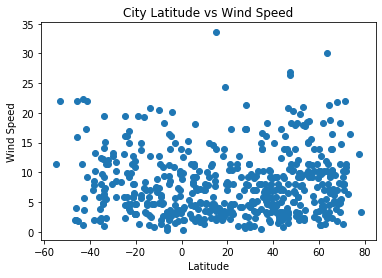

In [16]:
plt.scatter(weatherdf["Lat"], weatherdf["WindSpeed"])
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("output_data/City Latitude vs Wind Speed.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

In [17]:
weatherdf.head()

,City,Country,Lat,Temp,Cloudiness,Humidity,WindSpeed,Date
0,puerto ayora,EC,-0.74,75.20,40.0,69.0,10.29,1603837340
1,bethel,US,41.37,53.60,40.0,54.0,3.36,1603837199
2,yellowknife,CA,62.46,17.60,75.0,67.0,6.93,1603837361
3,chuy,UY,-33.70,61.72,100.0,94.0,14.05,1603837335
5,albany,US,42.60,48.99,100.0,64.0,2.39,1603837260


In [18]:
northdf = weatherdf[weatherdf['Lat'] > 0]
northdf

,City,Country,Lat,Temp,Cloudiness,Humidity,WindSpeed,Date
1,bethel,US,41.37,53.60,40.0,54.0,3.36,1603837199
2,yellowknife,CA,62.46,17.60,75.0,67.0,6.93,1603837361
5,albany,US,42.60,48.99,100.0,64.0,2.39,1603837260
7,puerto cabezas,NI,14.04,80.60,40.0,94.0,4.70,1603837368
10,qaqortoq,GL,60.72,32.00,100.0,99.0,1.12,1603837345
...,...,...,...,...,...,...,...,...
607,kwidzyn,PL,53.72,48.00,56.0,89.0,1.99,1603837439
608,mehamn,NO,71.04,32.00,0.0,84.0,8.05,1603837440
610,polovinnoye,RU,54.79,26.20,98.0,94.0,18.45,1603837440
611,anchorage,US,61.22,34.00,75.0,86.0,3.80,1603837440


In [19]:
southdf = weatherdf[weatherdf['Lat']  < 0]
southdf

,City,Country,Lat,Temp,Cloudiness,Humidity,WindSpeed,Date
0,puerto ayora,EC,-0.74,75.20,40.0,69.0,10.29,1603837340
3,chuy,UY,-33.70,61.72,100.0,94.0,14.05,1603837335
8,samarai,PG,-10.62,81.93,25.0,83.0,8.88,1603837088
9,saint-philippe,RE,-21.36,73.40,0.0,64.0,5.82,1603837368
23,hermanus,ZA,-34.42,61.00,100.0,92.0,4.83,1603837337
...,...,...,...,...,...,...,...,...
599,tual,ID,-5.67,83.26,81.0,75.0,11.14,1603837399
601,christchurch,NZ,-43.53,57.20,100.0,58.0,11.41,1603837439
602,walvis bay,NA,-22.96,59.00,25.0,82.0,9.17,1603837439
606,plettenberg bay,ZA,-34.05,61.81,77.0,67.0,6.31,1603837388


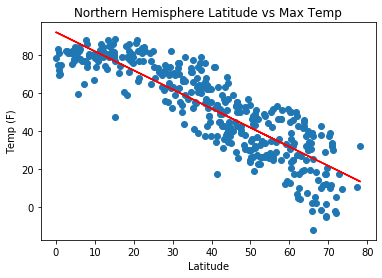

In [20]:
####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northdf["Lat"]
y_values = northdf["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere Latitude vs Max Temp")
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.savefig("output_data/North Latitude vs Max Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

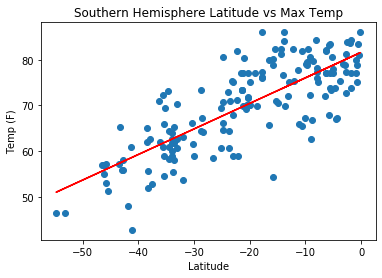

In [21]:
x_values = southdf["Lat"]
y_values = southdf["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Latitude vs Max Temp")
plt.ylabel("Temp (F)")
plt.xlabel("Latitude")
plt.savefig("output_data/South Latitude vs Max Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

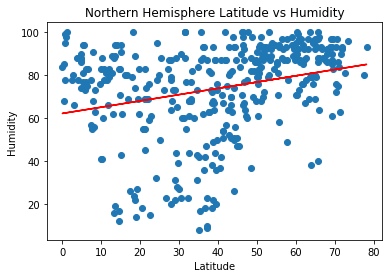

In [23]:
x_values = northdf["Lat"]
y_values = northdf["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("output_data/North Latitude vs Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

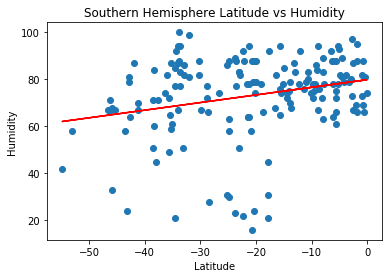

In [31]:
x_values = southdf["Lat"]
y_values = southdf["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("output_data/South Latitude vs Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

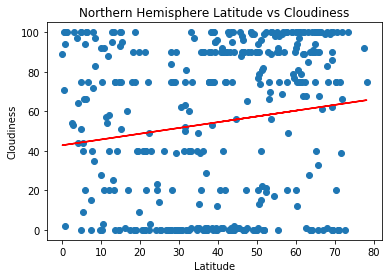

In [25]:
x_values = northdf["Lat"]
y_values = northdf["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("output_data/North Latitude vs Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

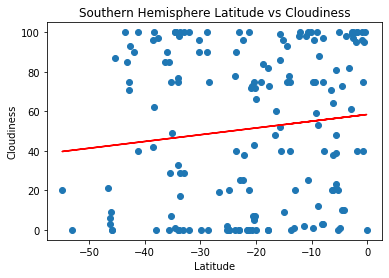

In [29]:
x_values = southdf["Lat"]
y_values = southdf["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("output_data/South Latitude vs Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

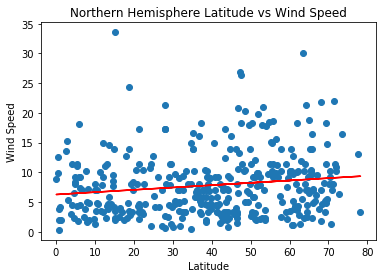

In [28]:
x_values = northdf["Lat"]
y_values = northdf["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("output_data/North Latitude vs Wind Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

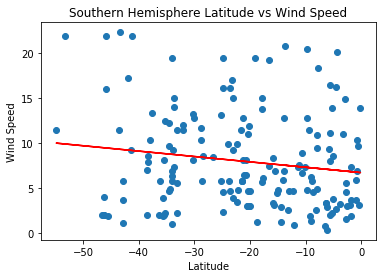

In [30]:
x_values = southdf["Lat"]
y_values = southdf["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("output_data/South Latitude vs Wind Speed.png")